In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import compare_model as cm

params = {
   'axes.labelsize': 18,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   } 
plt.rcParams.update(params)

In [2]:
# import verification data
ver_data = list(np.loadtxt("../Data/Verification_data.csv",dtype=int,delimiter=',',skiprows=1,usecols=(8)))

The probability of true outcome is 0.351
The probability of false outcome is 0.649


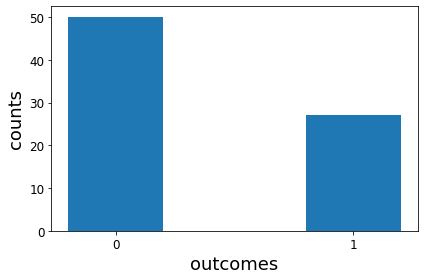

In [3]:
# classify the verification dataset
p_0,p_1 = cm.binary_distribution(ver_data)

## Check the prediction from the Random Forest model

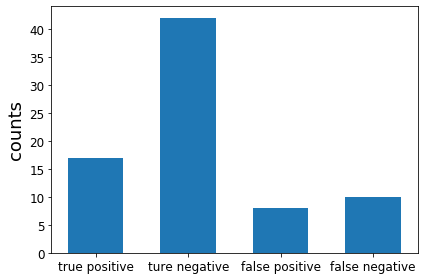

The sensitivity of the model is 0.630
The specificity of the model is 0.840
True positive: 17, True negative: 42, False positive: 8, False negative: 10
Accuracy: 0.766234


In [4]:
# import predicted data
pre_data = np.loadtxt('../Random_forest/RandomForest_Prediction.txt')
# determine the correctness of the prediction from the model 
classification,sensitivity,specificity = cm.Check_correctness(pre_data,ver_data,plot=True,figsize=[6,4])
print('True positive: %d, True negative: %d, False positive: %d, False negative: %d'%(classification[0],classification[1],classification[2],classification[3]))
print('Accuracy: %.6f'%((classification[0]+classification[1])/np.sum(classification)))

## Check the prediction from the weighting model

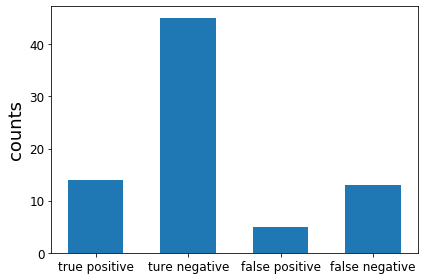

The sensitivity of the model is 0.519
The specificity of the model is 0.900
True positive: 14, True negative: 45, False positive: 5, False negative: 13
Accuracy: 0.766234


In [5]:
# import predicted data
pre_data = np.loadtxt('../Weighting/Prediction_weight.txt')
classification,sensitivity,specificity = cm.Check_correctness(pre_data,ver_data,plot=True,figsize=[6,4])
print('True positive: %d, True negative: %d, False positive: %d, False negative: %d'%(classification[0],classification[1],classification[2],classification[3]))
print('Accuracy: %.6f'%((classification[0]+classification[1])/np.sum(classification)))

## Check the prediction from the scoring model

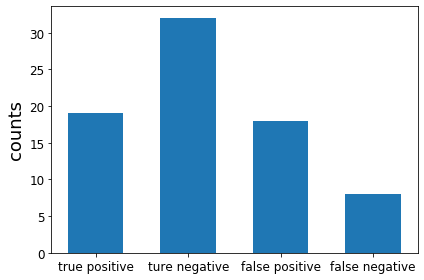

The sensitivity of the model is 0.704
The specificity of the model is 0.640
True positive: 19, True negative: 32, False positive: 18, False negative: 8
Accuracy: 0.662338


In [6]:
# import predicted data
pre_data = np.loadtxt('../Ka Folder/Prediction_score.txt')
classification,sensitivity,specificity = cm.Check_correctness(pre_data,ver_data,plot=True,figsize=[6,4])
print('True positive: %d, True negative: %d, False positive: %d, False negative: %d'%(classification[0],classification[1],classification[2],classification[3]))
print('Accuracy: %.6f'%((classification[0]+classification[1])/np.sum(classification)))